Analysis of the effects of the AD7768 Wideband filter on a square wave input.

See also AD7768/AD7768-4 datasheet Rev. A

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

In [2]:
Fsamp=250e3
Fsig=1e3
N=10000

T=np.arange(N)/Fsamp
V=sig.square(2*np.pi*Fsig*T)

<IPython.core.display.Javascript object>


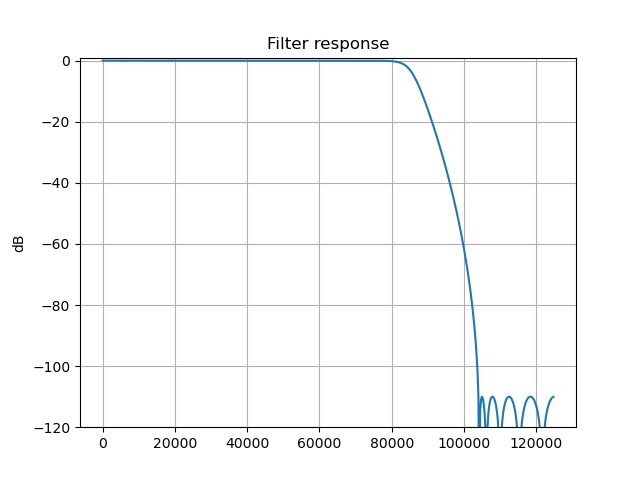

Text(0.5, 1.0, 'Filter response')

In [12]:
# approximation of AD7768 Wideband filter
#  0.005 dB pass-band ripple, DC -> 102.4KHz (@256 Ksps)
# Filter 88. Wideband Filter Frequency Response
#  <= -110 dB above Nyquist

filt = sig.iirfilter(
    output='sos',
    N=10, # guess??
    fs=Fsamp,
    btype='lowpass',
    ftype='cheby2',
    Wn=104e3,
    rp=0.005,
    rs=110,
)
resp_f, resp_amp = sig.sosfreqz(filt, fs=Fsamp)

plt.figure()
plt.plot(resp_f, 20*np.log10(np.abs(resp_amp)))
plt.ylim(-120, 1)
plt.ylabel('dB')
plt.grid(True)
plt.title('Filter response')

In [13]:
Vf = sig.sosfilt(filt, V)

<IPython.core.display.Javascript object>


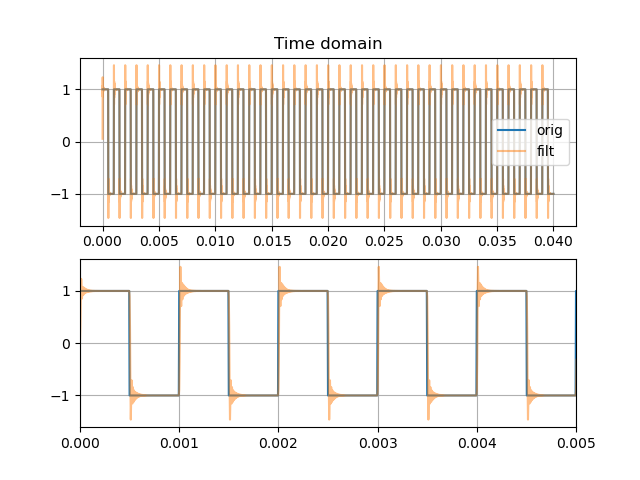

In [14]:
plt.figure()
plt.subplot(2,1,1)
plt.title('Time domain')
plt.plot(T,V, label='orig')
plt.plot(T,Vf, alpha=0.5, label='filt')
plt.grid(True)
plt.legend()
plt.subplot(2,1,2)
plt.plot(T,V)
plt.plot(T,Vf, alpha=0.5)
plt.xlim(0, 0.005)
plt.grid(True)

Ringing on edges consistent with datasheet Figure 90. Wideband Filter Step Response.

<IPython.core.display.Javascript object>


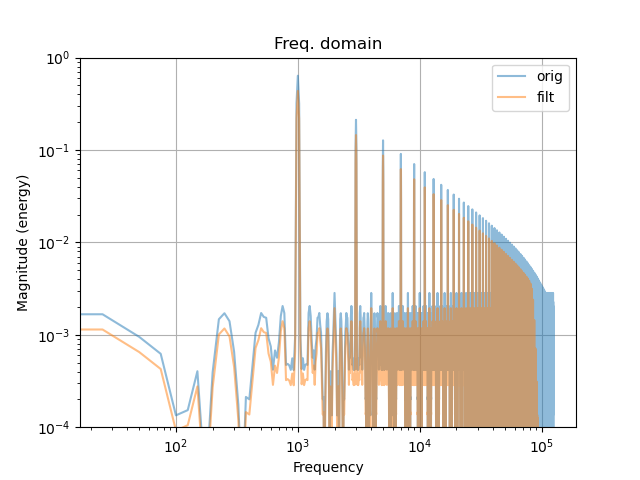

In [15]:
plt.figure()
plt.title('Freq. domain')
plt.magnitude_spectrum(V / V.max(), Fs=Fsamp, alpha=0.5, label='orig')
plt.magnitude_spectrum(Vf / Vf.max(), Fs=Fsamp, alpha=0.5, label='filt')
plt.xscale('log')
plt.yscale('log')
plt.ylim(10e-5, 1)
plt.grid(True)
plt.legend()